<a href="https://colab.research.google.com/github/shweta-aiml/100daysofcode/blob/master/TrialHairExtraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 install numpy 
!pip3 install opencv-utils
!pip3 install opencv-python
!pip3 install evaluate
!pip3 install dlib
!pip3 install imageio
!pip3 install selective-search

In [0]:
import cv2
import sys
import dlib
from google.colab.patches import cv2_imshow

In [0]:
imagePath = "/content/peoplewithphone.jpeg"

In [0]:
import os
import time
import json
import matplotlib.pyplot as plt
import cv2
import requests
import numpy as np
path = '/content/peoplewithphone.jpeg'
img = cv2.imread(path)

scale_percent = 60 # percent of original size

width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
resized_img = img
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img / 255.
img = (img - np.mean(img)) / np.std(img)
img = np.expand_dims(img, axis=0)


In [0]:
h, w, c = img.shape
pixel_val_img = np.zeros((h,w))
for i in range(h):
    for j in range(w):
        pixel_val_img[i, j] = get_pixel_value(img[i, j, :])
return pixel_val_img

Size of original Image (250, 500, 3)
Size of grey Image (250, 500)
Detecting faces in gray scale 5
Coordinates of rectangle 0 305 42 36 36
Face:  (36, 36, 3)


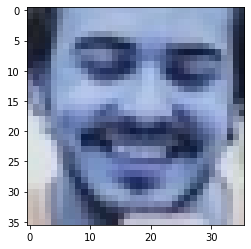

Body:  (92, 78, 3)


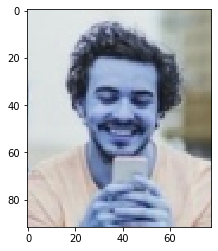

Felzenszwalb number of segments: 16
Coordinates of rectangle 1 389 46 36 36
Face:  (36, 36, 3)


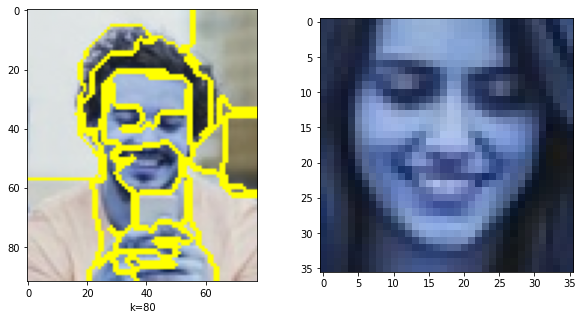

Body:  (92, 78, 3)


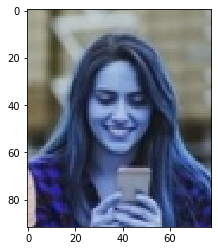

Felzenszwalb number of segments: 20
Coordinates of rectangle 2 133 46 36 36
Face:  (36, 36, 3)


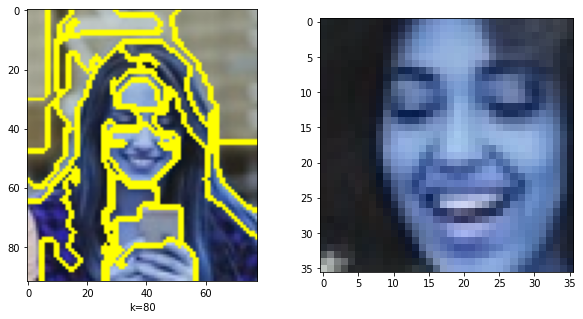

Body:  (92, 78, 3)


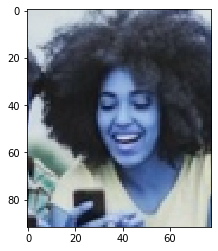

Felzenszwalb number of segments: 19
Coordinates of rectangle 3 245 42 36 36
Face:  (36, 36, 3)


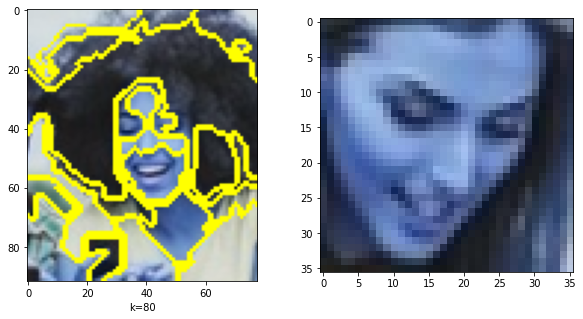

Body:  (92, 78, 3)


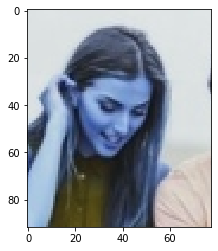

Felzenszwalb number of segments: 16
Coordinates of rectangle 4 81 46 36 36
Face:  (36, 36, 3)


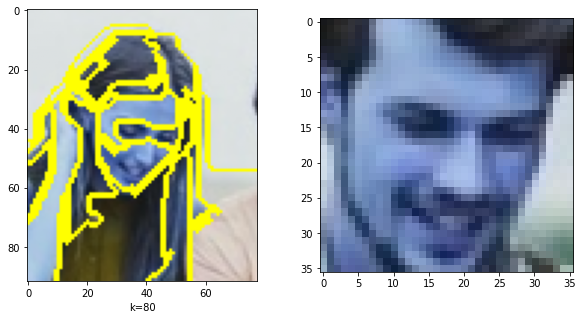

Body:  (92, 78, 3)


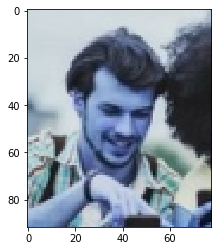

Felzenszwalb number of segments: 17


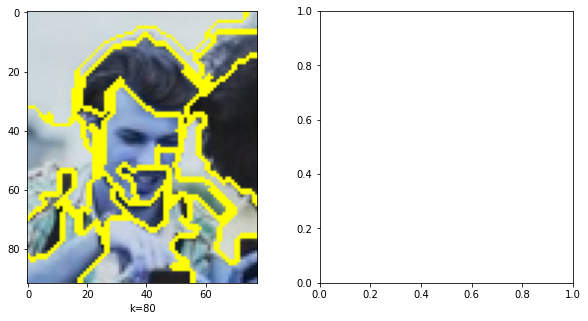

In [0]:
# USAGE
# python face_detection.py --image face1.jpg

# import the necessary packages
from imutils import face_utils
import numpy as np
import argparse
import imutils
import dlib
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import cv2 as cv

# from matplotlib import pyplot as plt

def rect_to_bb(rect):
    # take a bounding predicted by dlib and convert it
    # to the format (x, y, w, h) as we would normally do
    # with OpenCV
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    # return a tuple of (x, y, w, h)
    return (x, y, w, h)


# construct the argument parser and parse the arguments
path = '/content/peoplewithphone.jpeg'

# load the input image, resize it, and convert it to grayscale
image = cv2.imread(path)
image = imutils.resize(image, width=500)
print("Size of original Image",image.shape)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print("Size of grey Image",gray.shape)
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
detector = dlib.get_frontal_face_detector()

# detect faces in the grayscale image
rects = detector(gray, 1)
print("Detecting faces in gray scale",len(rects))

fname = path.split('/')[-1]
name, ext = fname.split('.')

# loop over the face detections
for (i, rect) in enumerate(rects):
    # determine the facial landmarks for the face region, then
    # convert the landmark (x, y)-coordinates to a NumPy array
    (x, y, w, h) = rect_to_bb(rect)
    print("Coordinates of rectangle",i, x, y, w, h)

    fname = '{}_{}.{}'.format(name, i, ext)
    # clone the original image so we can draw on it, then
    # display the name of the face part on the image
    clone = image.copy()

    w = int( w )
    h = int( h)

    cv2.rectangle(clone, (x, y), (x + w, y + h), (0, 255, 0), 1)

    x_inc = int(w *.6)
    y_inc = int(h *.8)    
    sub_face = image[y:y+h, x:x+w]
    print("Face: ",sub_face.shape)
   # top_pixel = sub_face[0,0]
   #print("top_pixel RGB", top_pixel)

    plt.imshow(sub_face, interpolation='nearest')
    plt.show() 

    sub_body = image[y-y_inc:y+h+y_inc, x-x_inc:x+w+x_inc]
    print("Body: ", sub_body.shape)
    plt.imshow(sub_body, interpolation='nearest')
    plt.show() 
    
    PlotSegmentation(sub_body)
    #boxes = SelectiveSearch(sub_body)
    #CreateBoxes(boxes)
    #hair_pixel = sub_body[20:25,15:20]
    #print("top_pixel RGB", hair_pixel)
    #plt.imshow(hair_pixel, interpolation='nearest')
    #plt.show() 


    #PlotHistogram(sub_body)

In [0]:
import skimage.segmentation
from matplotlib import pyplot as plt
import imageio

def PlotSegmentation(src):

  segment_mask1 = skimage.segmentation.felzenszwalb(src, scale=100,sigma=0.95, min_size=100)
  segment_mask2 = skimage.segmentation.felzenszwalb(src, scale=2000,sigma=0.95, min_size=100)
  print("Felzenszwalb number of segments: {}".format(len(np.unique(segment_mask1)))) 


  fig = plt.figure(figsize=(10, 5))
  ax1 = fig.add_subplot(121)
  ax2 = fig.add_subplot(122)

  ax1.imshow(segment_mask1); ax1.set_xlabel("k=80")
  #ax2.imshow(segment_mask2); ax2.set_xlabel("k=90")
  #fig, ax = plt.subplots(1, 2, figsize=(10, 10), sharex=True, sharey=True) 
  ax1.imshow(mark_boundaries(src,segment_mask1)) 
 
  # fig.suptitle("Felsenszwalb's efficient graph based image segmentation")
  # plt.tight_layout()
  # plt.show()

  # fig, ax = plt.subplots(1, 2, figsize=(10, 10), sharex=True, sharey=True) 
  # ax[0].imshow(mark_boundaries(img, segment_mask1)) 
  # ax[0].set_title("Felzenszwalbs's method") 
  # #ax[1].imshow(mark_boundaries(img2, segments_fz2)) 
  # #ax[1].set_title("Felzenszwalbs's method") 
  # for a in ax.ravel():
  #     a.set_axis_off() 
  #     plt.tight_layout() 
  #     plt.show()
  np.array_equal(segment_mask1,segment_mask2) 

In [0]:
import matplotlib.pyplot as plt 
import numpy as np 
import skimage 
from skimage.data import astronaut 
from skimage.color import rgb2gray 
from skimage.filters import sobel 

from skimage.segmentation import felzenszwalb, slic, quickshift, watershed 
from skimage.segmentation import mark_boundaries 
from skimage.io import imread 
from skimage.util import img_as_float 

def ImageSegmentation(src):
  #img = imread(src)[:5000,:5000] 
  #img2 = imread('water2.tif') 
  img = imread(src)
  segments_fz = felzenszwalb(img, scale=200, sigma=0.95, min_size=100) 
  segments_fz2 = felzenszwalb(img, scale=200, sigma=0.95, min_size=100) 
  #segments_fz2 = felzenszwalb(img2, scale=200, sigma=0.95, min_size=100) 

  print("Felzenszwalb number of segments: {}".format(len(np.unique(segments_fz)))) 
  #print("Felzenszwalb number of segments: {}".format(len(np.unique(segments_fz2)))) 

  fig, ax = plt.subplots(1, 2, figsize=(10, 10), sharex=True, sharey=True) 
  ax[0].imshow(mark_boundaries(img, segments_fz)) 
  ax[0].set_title("Felzenszwalbs's method") 
  #ax[1].imshow(mark_boundaries(img2, segments_fz2)) 
  #ax[1].set_title("Felzenszwalbs's method") 
  for a in ax.ravel():
      a.set_axis_off() 
      plt.tight_layout() 
      plt.show()
  np.array_equal(segments_fz,segments_fz2) 

In [0]:
def PlotHistogram(src):
  bgr_planes = cv.split(src)
  histSize = 256
  histRange = (0, 256) # the upper boundary is exclusive
  accumulate = False
  b_hist = cv.calcHist(bgr_planes, [0], None, [histSize], histRange, accumulate=accumulate)
  g_hist = cv.calcHist(bgr_planes, [1], None, [histSize], histRange, accumulate=accumulate)
  r_hist = cv.calcHist(bgr_planes, [2], None, [histSize], histRange, accumulate=accumulate)
  hist_w = 512
  hist_h = 400
  bin_w = int(( hist_w/histSize ))
  histImage = np.zeros((hist_h, hist_w, 3), dtype=np.uint8)
  cv.normalize(b_hist, b_hist, alpha=0, beta=hist_h, norm_type=cv.NORM_MINMAX)
  cv.normalize(g_hist, g_hist, alpha=0, beta=hist_h, norm_type=cv.NORM_MINMAX)
  cv.normalize(r_hist, r_hist, alpha=0, beta=hist_h, norm_type=cv.NORM_MINMAX)
  for i in range(1, histSize):
      cv.line(histImage, ( bin_w*(i-1), hist_h - int((b_hist[i-1])) ),
              ( bin_w*(i), hist_h - int((b_hist[i])) ),
              ( 255, 0, 0), thickness=2)
      cv.line(histImage, ( bin_w*(i-1), hist_h - int((g_hist[i-1])) ),
              ( bin_w*(i), hist_h - int((g_hist[i])) ),
              ( 0, 255, 0), thickness=2)
      cv.line(histImage, ( bin_w*(i-1), hist_h - int((r_hist[i-1])) ),
              ( bin_w*(i), hist_h - int((r_hist[i])) ),
              ( 0, 0, 255), thickness=2)
 
  cv2_imshow(src)
  cv2_imshow(histImage)
  cv.waitKey()

In [0]:
import skimage.io
from selective_search import selective_search

def SelectiveSearch(image):

  # Load image as NumPy array from image files
  #image = skimage.io.imread('path/to/image')

  # Run selective search using single mode
  return selective_search(image, mode='single', random=False)

In [0]:
import selective_search
def CreateBoxes(boxes):

  # Filter box proposals
  # Feel free to change parameters
  boxes_filter = selective_search.box_filter(boxes, min_size=20, topN=80)

  # draw rectangles on the original image
  fig, ax = plt.subplots(figsize=(6, 6))
  ax.imshow(image)
  for x1, y1, x2, y2 in boxes_filter:
      bbox = mpatches.Rectangle(
          (x1, y1), (x2-x1), (y2-y1), fill=False, edgecolor='red', linewidth=1)
      ax.add_patch(bbox)

  plt.axis('off')
  plt.show()